In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("/content/train.csv")

In [3]:
# Preview
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [5]:
# Drop columns with too many missing values
df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], inplace=True)

In [6]:
# Fill numerical NaNs with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
# Fill categorical NaNs with mode
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-7-683727907.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
# Convert categorical to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [13]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [14]:
#Evaluate
print("Linear R2:", r2_score(y_test, lr_preds))
print("Random Forest R2:", r2_score(y_test, rf_preds))

Linear R2: 0.8455080985714246
Random Forest R2: 0.8973617508786242


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

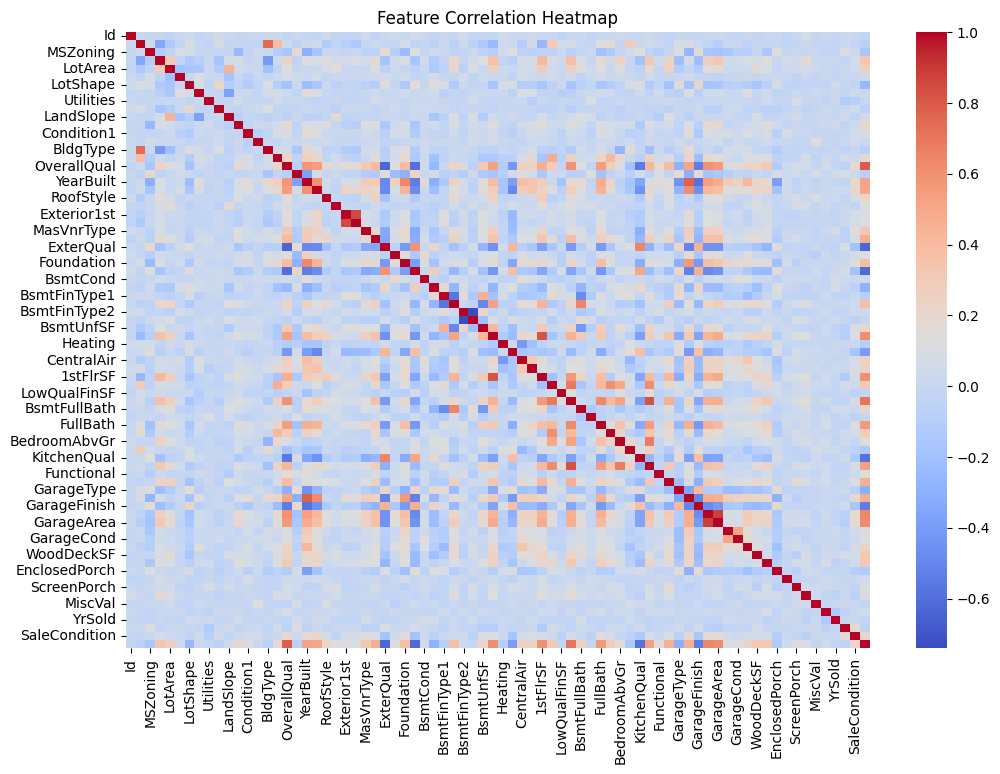

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

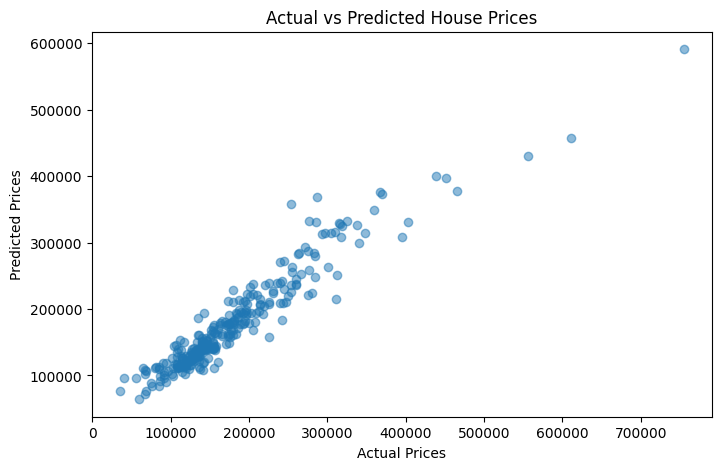

In [17]:
# Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_preds, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [18]:
# Save predictions to CSV
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": rf_preds})
pred_df.to_csv("house_price_predictions.csv", index=False)